<a href="https://colab.research.google.com/github/AlexandreSaldanha/AlexandreSaldanha/blob/main/MVP_Dados03.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MVP de Análise de Dados e Boas Práticas
# **Alexandre Pereira Saldanha**

# **1. Definição do Problema**
O dataset do projeto será o **Life Expectancy** do Observatório Global de Saúde (GHO) da Organização Mundial da Saúde (OMS). O objetivo é prever a expectativa de vida dos países, ou seja, um problema de regressão. Para isso, usamos como variáveis preditoras dados relacionados à imunização, mortalidade, dados econômicos e sociais. Neste projeto consideramos dados de 2000-2015 para 193 países. Para mais detalhes sobre o dataset: https://www.kaggle.com/datasets/kumarajarshi/life-expectancy-who/




**Significado dos atributos:**
1.	Country: País
2.	Year: Ano
3.	Status: status de país desenvolvido ou em desenvolvimento
4.	Life expectancy: Expectativa de vida em idade
5.	Adult Mortality: Taxas de Mortalidade de Adultos de ambos os sexos (probabilidade de morrer entre 15 e 60 anos por 1000 habitantes)
6.	infant deaths: Número de mortes infantis por 1.000 habitantes
7.	Alcohol: Consumo per capita registrado (15+) (em litros de álcool puro)
8. Despesa percentual: Despesas com saúde como porcentagem do Produto Interno Bruto per capita (%)
9.	Hepatitis B: Cobertura vacinal contra hepatite B (HepB) entre crianças de 1 ano (%)
10.	Measles: Sarampo - número de casos notificados por 1000 habitantes
11.	BMI: Índice de Massa Corporal Médio de toda a população
12.	under-five deaths: Número de mortes de menores de cinco anos por 1000 habitantes
13.	Polio: Cobertura vacinal contra a poliomielite (Pol3) entre crianças de 1 ano (%)
14.	Total expenditure: Despesas do governo geral com saúde como percentagem das despesas totais do governo (%)
15.	Diphtheria: Cobertura vacinal contra difteria, tétano e tosse convulsa (DTP3) entre crianças de 1 ano (%)
16.	HIV/AIDS: Mortes por 1 000 nados-vivos HIV/AIDS (0-4 anos)
17.	GDP: Produto Interno Bruto per capita (em dólares americanos)
18.	Population: População do país
19.	thinness  1-19 years: Prevalência de magreza entre crianças e adolescentes de 10 a 19 anos (%)
20.	thinness  5-9 years: Prevalência de magreza entre crianças de 5 a 9 ano (%)
21.	Income composition of resources: Índice de Desenvolvimento Humano em termos de composição da renda dos recursos (índice variando de 0 a 1)
22.	Schooling: Número de anos de escolaridade (anos)



In [144]:
# Configuração para não exibir os warnings
import warnings
warnings.filterwarnings("ignore")

In [145]:
# Imports
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as ms # para tratamento de missings
from matplotlib import cm
from pandas import set_option
from pandas.plotting import scatter_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier

# **2. Carregando Dados**

In [3]:
# Informa a URL de importação do dataset
url = "https://raw.githubusercontent.com/AlexandreSaldanha/AlexandreSaldanha/main/Expectativa_Vida"

# Lê o arquivo
dataset = pd.read_csv(url, delimiter=',')

In [12]:
# Mostra os dados carregados
dataset.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


# **3. Análise de Dados**

**3.1. Estatísticas Descritivas**

Vamos analisar o dataset, suas dimensões, informações e alguns atributos e linhas.

In [4]:
# Mostra as 10 primeiras linhas do dataset
dataset.head(10)

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5
5,Afghanistan,2010,Developing,58.8,279.0,74,0.01,79.679367,66.0,1989,...,66.0,9.20,66.0,0.1,553.328940,2883167.0,18.4,18.4,0.448,9.2
6,Afghanistan,2009,Developing,58.6,281.0,77,0.01,56.762217,63.0,2861,...,63.0,9.42,63.0,0.1,445.893298,284331.0,18.6,18.7,0.434,8.9
7,Afghanistan,2008,Developing,58.1,287.0,80,0.03,25.873925,64.0,1599,...,64.0,8.33,64.0,0.1,373.361116,2729431.0,18.8,18.9,0.433,8.7
8,Afghanistan,2007,Developing,57.5,295.0,82,0.02,10.910156,63.0,1141,...,63.0,6.73,63.0,0.1,369.835796,26616792.0,19.0,19.1,0.415,8.4
9,Afghanistan,2006,Developing,57.3,295.0,84,0.03,17.171518,64.0,1990,...,58.0,7.43,58.0,0.1,272.563770,2589345.0,19.2,19.3,0.405,8.1


In [7]:
# Mostra as 10 últimas linhas do dataset
dataset.tail(10)

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
2928,Zimbabwe,2009,Developing,50.0,587.0,30,4.64,1.040021,73.0,853,...,69.0,6.26,73.0,18.1,65.824121,1381599.0,7.5,7.4,0.419,9.9
2929,Zimbabwe,2008,Developing,48.2,632.0,30,3.56,20.843429,75.0,0,...,75.0,4.96,75.0,20.5,325.678573,13558469.0,7.8,7.8,0.421,9.7
2930,Zimbabwe,2007,Developing,46.6,67.0,29,3.88,29.814566,72.0,242,...,73.0,4.47,73.0,23.7,396.998217,1332999.0,8.2,8.2,0.414,9.6
2931,Zimbabwe,2006,Developing,45.4,7.0,28,4.57,34.262169,68.0,212,...,71.0,5.12,7.0,26.8,414.796232,13124267.0,8.6,8.6,0.408,9.5
2932,Zimbabwe,2005,Developing,44.6,717.0,28,4.14,8.717409,65.0,420,...,69.0,6.44,68.0,30.3,444.765750,129432.0,9.0,9.0,0.406,9.3
2933,Zimbabwe,2004,Developing,44.3,723.0,27,4.36,0.000000,68.0,31,...,67.0,7.13,65.0,33.6,454.366654,12777511.0,9.4,9.4,0.407,9.2
2934,Zimbabwe,2003,Developing,44.5,715.0,26,4.06,0.000000,7.0,998,...,7.0,6.52,68.0,36.7,453.351155,12633897.0,9.8,9.9,0.418,9.5
2935,Zimbabwe,2002,Developing,44.8,73.0,25,4.43,0.000000,73.0,304,...,73.0,6.53,71.0,39.8,57.348340,125525.0,1.2,1.3,0.427,10.0
2936,Zimbabwe,2001,Developing,45.3,686.0,25,1.72,0.000000,76.0,529,...,76.0,6.16,75.0,42.1,548.587312,12366165.0,1.6,1.7,0.427,9.8
2937,Zimbabwe,2000,Developing,46.0,665.0,24,1.68,0.000000,79.0,1483,...,78.0,7.10,78.0,43.5,547.358878,12222251.0,11.0,11.2,0.434,9.8


In [8]:
# Corrige espaço vazio das colunas

dataset.columns = dataset.columns.str.strip()

In [9]:
# Mostra as informações do dataset
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   object 
 3   Life expectancy                  2928 non-null   float64
 4   Adult Mortality                  2928 non-null   float64
 5   infant deaths                    2938 non-null   int64  
 6   Alcohol                          2744 non-null   float64
 7   percentage expenditure           2938 non-null   float64
 8   Hepatitis B                      2385 non-null   float64
 9   Measles                          2938 non-null   int64  
 10  BMI                              2904 non-null   float64
 11  under-five deaths                2938 non-null   int64  
 12  Polio               

In [10]:
# Mostra as dimensões do dataset
dataset.shape

(2938, 22)

In [13]:
# Mostra a distribuição do dataset e quantidade de países por satus, além da frequencia do paises em anos
dataset['Country'].groupby(dataset.Status).describe()

,count,unique,top,freq
Status,,,,
Developed,512,32,Australia,16
Developing,2426,161,Afghanistan,16


O dataset está distribuido em **32 países desenvolvidos** e **161 em desenvolvimento**. Com **frequêncio de 16 anos** (200-2015).

In [ ]:
# Cria função que usa a coluna categórica Status no gráfico de pizza
def pie_plot(Status):

  plt.pie(dataset[Status].value_counts(), labels = dataset[Status].value_counts().index, shadow = True, autopct = "%1.1f%%")

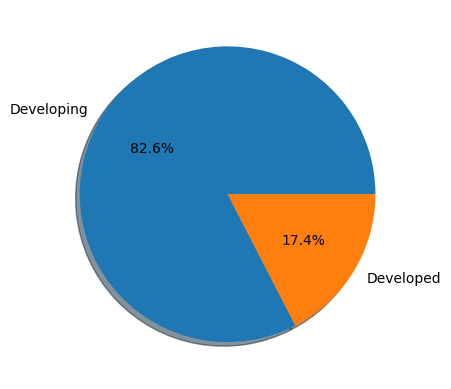

In [ ]:
# Mostra o Gráfico de pizza com a distribuição percentual dos status
pie_plot('Status')

A **distribuição desbalanceada deixa a análise enviesada**, uma vez que os países em desenvolvimento representam quase 83% do conjunto de dados, enquanto os desenvolvidos apenas 17%.

In [19]:
# cria função que visualiza atributos numéricas usando box plot
def box_plot(x_axis = None, y_axis = None):

    sns.boxplot(x = x_axis, y = y_axis, data = dataset)
    plt.xlabel(x_axis)
    plt.ylabel("Expectativa de vida")
    plt.show()

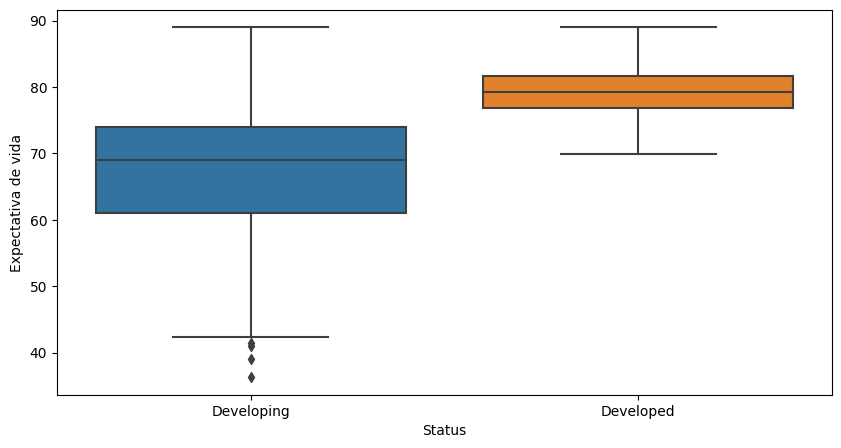

In [20]:
# Mostra a o boxplot da função criada
plt.figure(figsize=(10,5))

box_plot(x_axis = "Status", y_axis = "Life expectancy")

Observado o boxplot, vemos que **a mediana da expectativa de vida dos paises em desenvolvimento fica abaixo dos 70 anos**, enquanto dos **países desenvolvidos é proxima de 80 anos**. Também é possivel notar alguna **outliers nos pises em desenvolvimento. **

In [49]:
# filtrando o dataset somente com países desenvolvidos
dataset01 = dataset.query('Status == "Developed"')

In [50]:
# # Mostra as dimensões do dataset01
dataset01.shape

(512, 22)

In [23]:
# filtrando o dataset somente com países em desenvolvimento
dataset02 = dataset.query('Status == "Developing"')

In [24]:
# Mostra as dimensões do dataset02
dataset02.shape

(2426, 22)

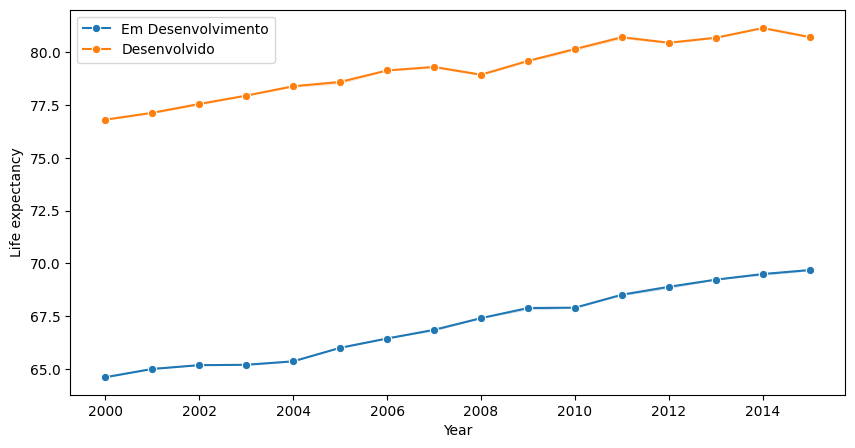

In [29]:
# Grágico de linhas mostra a evolução da Expectativa de vida ao longo dos anos

plt.figure(figsize=(10,5))

sns.lineplot(x = 'Year', y = 'Life expectancy', data = dataset02, label = 'Em Desenvolvimento', marker = 'o' ,errorbar=('ci', False))
sns.lineplot(x = 'Year', y = 'Life expectancy', data = dataset01, label = 'Desenvolvido', marker = 'o' ,errorbar=('ci', False))

plt.show()

**A evolução anual mostra que a expectativa de vida dos países em desenvolvimento vem crescendo, de 65 anos em 2000 para quase 70 anos em 2015,  mais do que em paises desenvolvidos, que aumentou cerca de 3 anos.**

**Contudo, os paises desenvolvidos tem expectativa de vida em média 10 anos maior do que os países em desenvolvimento, ao longo do período analisado.**

In [30]:
# Resumo estatístico dos países desenvolvidos
dataset01.describe()

,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
count,512.000000,512.000000,512.000000,512.000000,484.000000,512.000000,339.000000,512.000000,512.000000,512.000000,512.000000,480.000000,512.000000,5.120000e+02,448.000000,4.160000e+02,512.000000,512.000000,464.000000,464.000000
mean,2007.500000,79.197852,79.685547,1.494141,9.826736,2703.600380,88.041298,499.005859,51.803906,1.810547,93.736328,7.554042,93.476562,1.000000e-01,22053.386446,6.830053e+06,1.320703,1.296680,0.852489,15.845474
std,4.614281,3.930942,47.877583,4.585774,2.765858,3824.200588,20.489240,2529.084588,17.196829,5.384006,10.783713,2.984389,12.531113,1.389136e-17,22870.827763,1.479524e+07,0.756577,0.829099,0.052843,1.766799
min,2000.000000,69.900000,1.000000,0.000000,0.010000,0.000000,2.000000,0.000000,3.200000,0.000000,9.000000,1.100000,9.000000,1.000000e-01,12.277330,1.230000e+02,0.300000,0.200000,0.703000,11.500000
25%,2003.750000,76.800000,58.000000,0.000000,8.617500,92.904052,89.000000,0.000000,53.775000,0.000000,93.000000,6.407500,93.750000,1.000000e-01,3875.740910,1.993282e+05,0.700000,0.600000,0.815000,14.700000
50%,2007.500000,79.250000,73.000000,0.000000,10.320000,846.615644,95.000000,12.000000,57.450000,0.000000,96.000000,7.895000,96.000000,1.000000e-01,13560.723860,1.167660e+06,1.100000,1.000000,0.862000,15.800000
75%,2011.250000,81.700000,96.000000,1.000000,11.697500,4102.863046,97.000000,96.500000,61.300000,2.000000,98.000000,9.212500,98.000000,1.000000e-01,36760.425993,5.759450e+06,1.900000,1.900000,0.894000,16.800000
max,2015.000000,89.000000,229.000000,28.000000,15.190000,19479.911610,99.000000,33812.000000,69.600000,33.000000,99.000000,17.600000,99.000000,1.000000e-01,119172.741800,8.253418e+07,4.000000,4.300000,0.948000,20.700000


In [32]:
# Resumo estatístico dos países em desenvolvimento
dataset02.describe()

,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
count,2426.000000,2416.000000,2416.000000,2426.000000,2260.000000,2426.000000,2046.000000,2426.000000,2392.000000,2426.000000,2407.000000,2232.000000,2407.000000,2426.000000,2042.000000,1.870000e+03,2392.000000,2392.000000,2307.000000,2311.000000
mean,2007.522671,67.111465,182.833195,36.384171,3.484119,323.470285,79.763930,2824.926216,35.435326,50.525144,80.170752,5.590694,79.951807,2.088664,4286.556053,1.407108e+07,5.592935,5.635242,0.582310,11.219256
std,4.614690,9.006092,127.974557,128.942509,3.347537,846.655356,25.564884,12528.811419,19.425091,175.379909,24.671531,2.233756,24.834300,5.526145,8772.467789,6.702886e+07,4.514453,4.606130,0.201597,3.056601
min,2000.000000,36.300000,1.000000,0.000000,0.010000,0.000000,1.000000,0.000000,1.000000,0.000000,3.000000,0.370000,2.000000,0.100000,1.681350,3.400000e+01,0.100000,0.100000,0.000000,0.000000
25%,2004.000000,61.100000,92.000000,1.000000,0.517500,3.616102,75.000000,0.000000,18.300000,1.000000,74.000000,4.140000,75.000000,0.100000,382.749830,1.938082e+05,2.100000,2.100000,0.466500,9.600000
50%,2008.000000,69.000000,163.000000,6.000000,2.560000,48.431829,91.000000,18.000000,35.200000,7.000000,91.000000,5.400000,91.000000,0.100000,1246.021671,1.404827e+06,4.500000,4.600000,0.631000,11.700000
75%,2012.000000,74.000000,253.000000,28.000000,5.750000,257.702204,97.000000,514.500000,53.200000,39.000000,97.000000,6.830000,96.500000,1.400000,4147.739877,7.735673e+06,7.725000,7.800000,0.727000,13.200000
max,2015.000000,89.000000,723.000000,1800.000000,17.870000,9748.636237,99.000000,212183.000000,87.300000,2500.000000,99.000000,17.240000,99.000000,50.600000,88564.822980,1.293859e+09,27.700000,28.600000,0.919000,18.300000


**O resumo estatístico mostra que há diferenças estruturais nas vaiáveis de saúde coletiva, econômicas e sociais.**

**No caso da saúde coletiva, os paises em desenvolvimento tem piores indicadores em relação aos desenvolvidos. A média de Cobertura Vacinal de Hepatite, Sarampo e Índice de Massa Corporal Médio de toda a população e HIV.**

**No que tange as informções econômicas e sociais, os países desenvolvidos tem indicadores bastante superiores. Aliás, isso os determinam como desenvolvidos: PIB, ecolaridade e mortalidade infantil e adulta, por exemplo.**

### 3.2. Visualizações Unimodais
Vamos mostrar um histograma para cada atributo dos datasets dos paises desenvolvidos e em desenvolvimento.

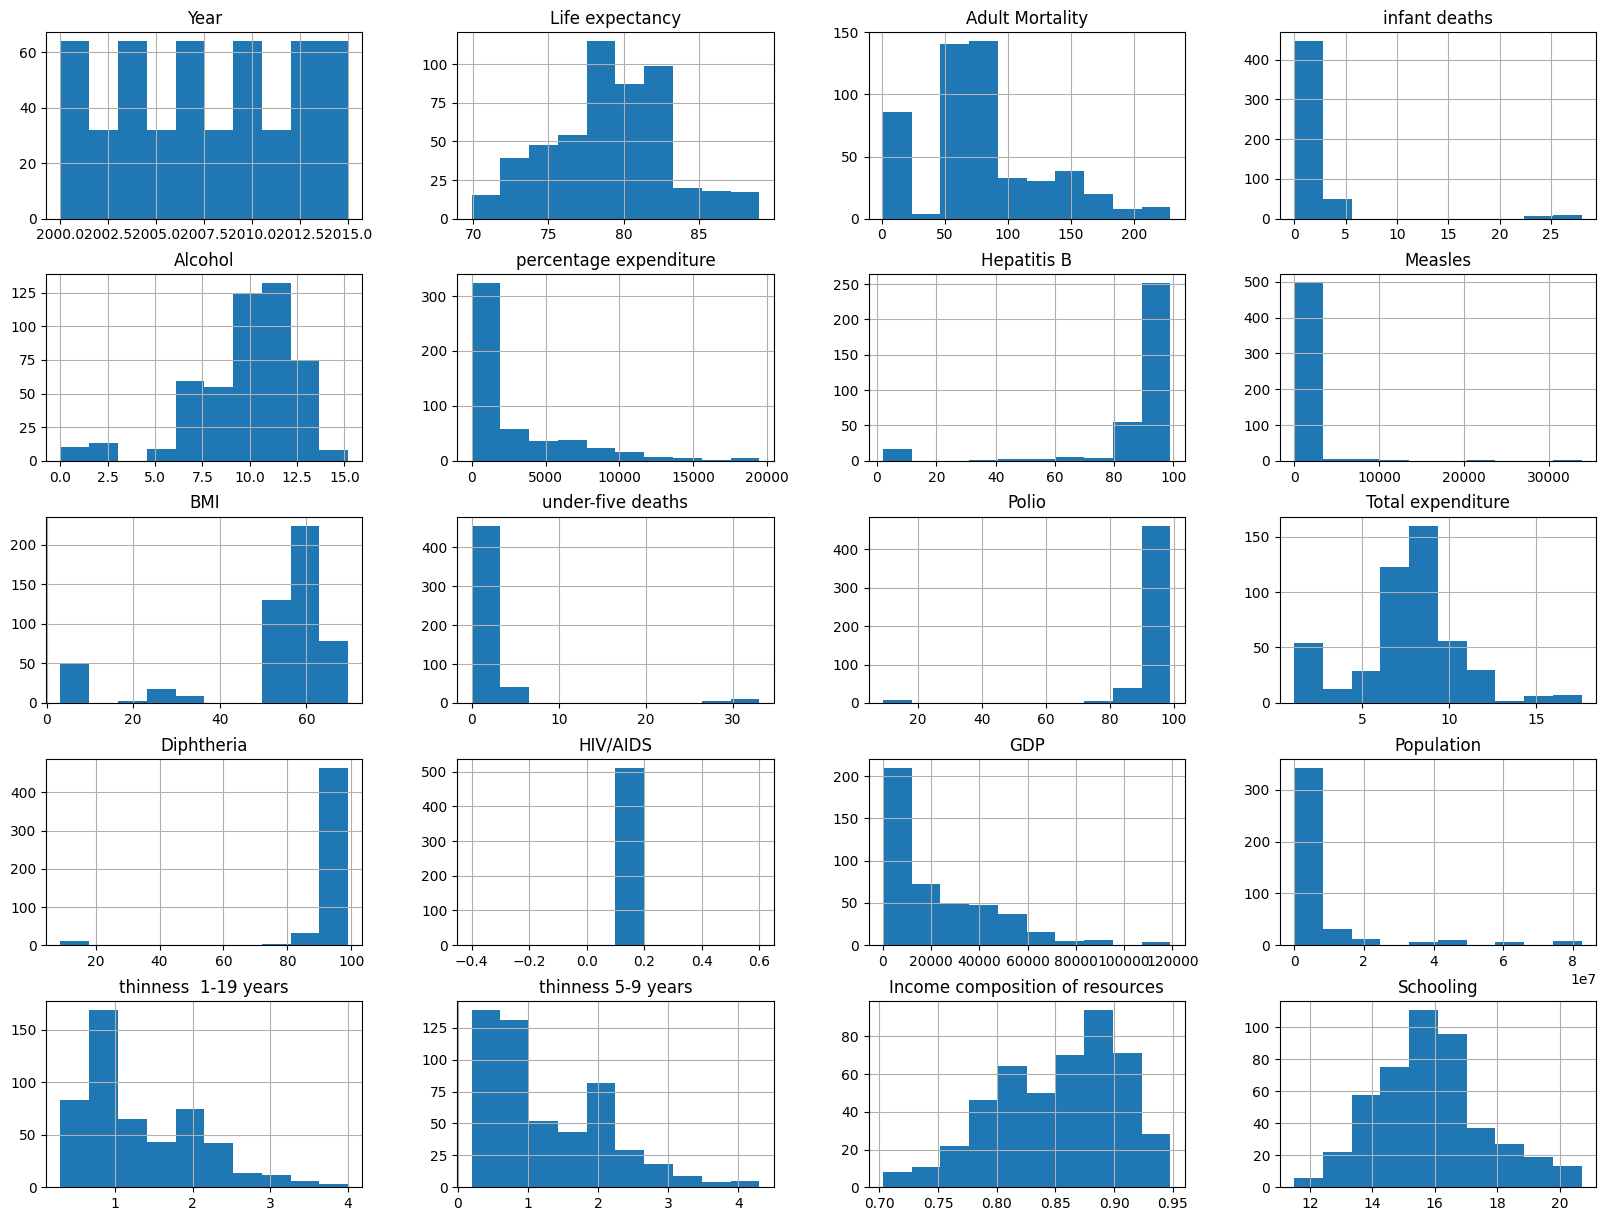

In [33]:
# Histograma dos países desenvolvidos
dataset01.hist(figsize = (20,15))
plt.show()

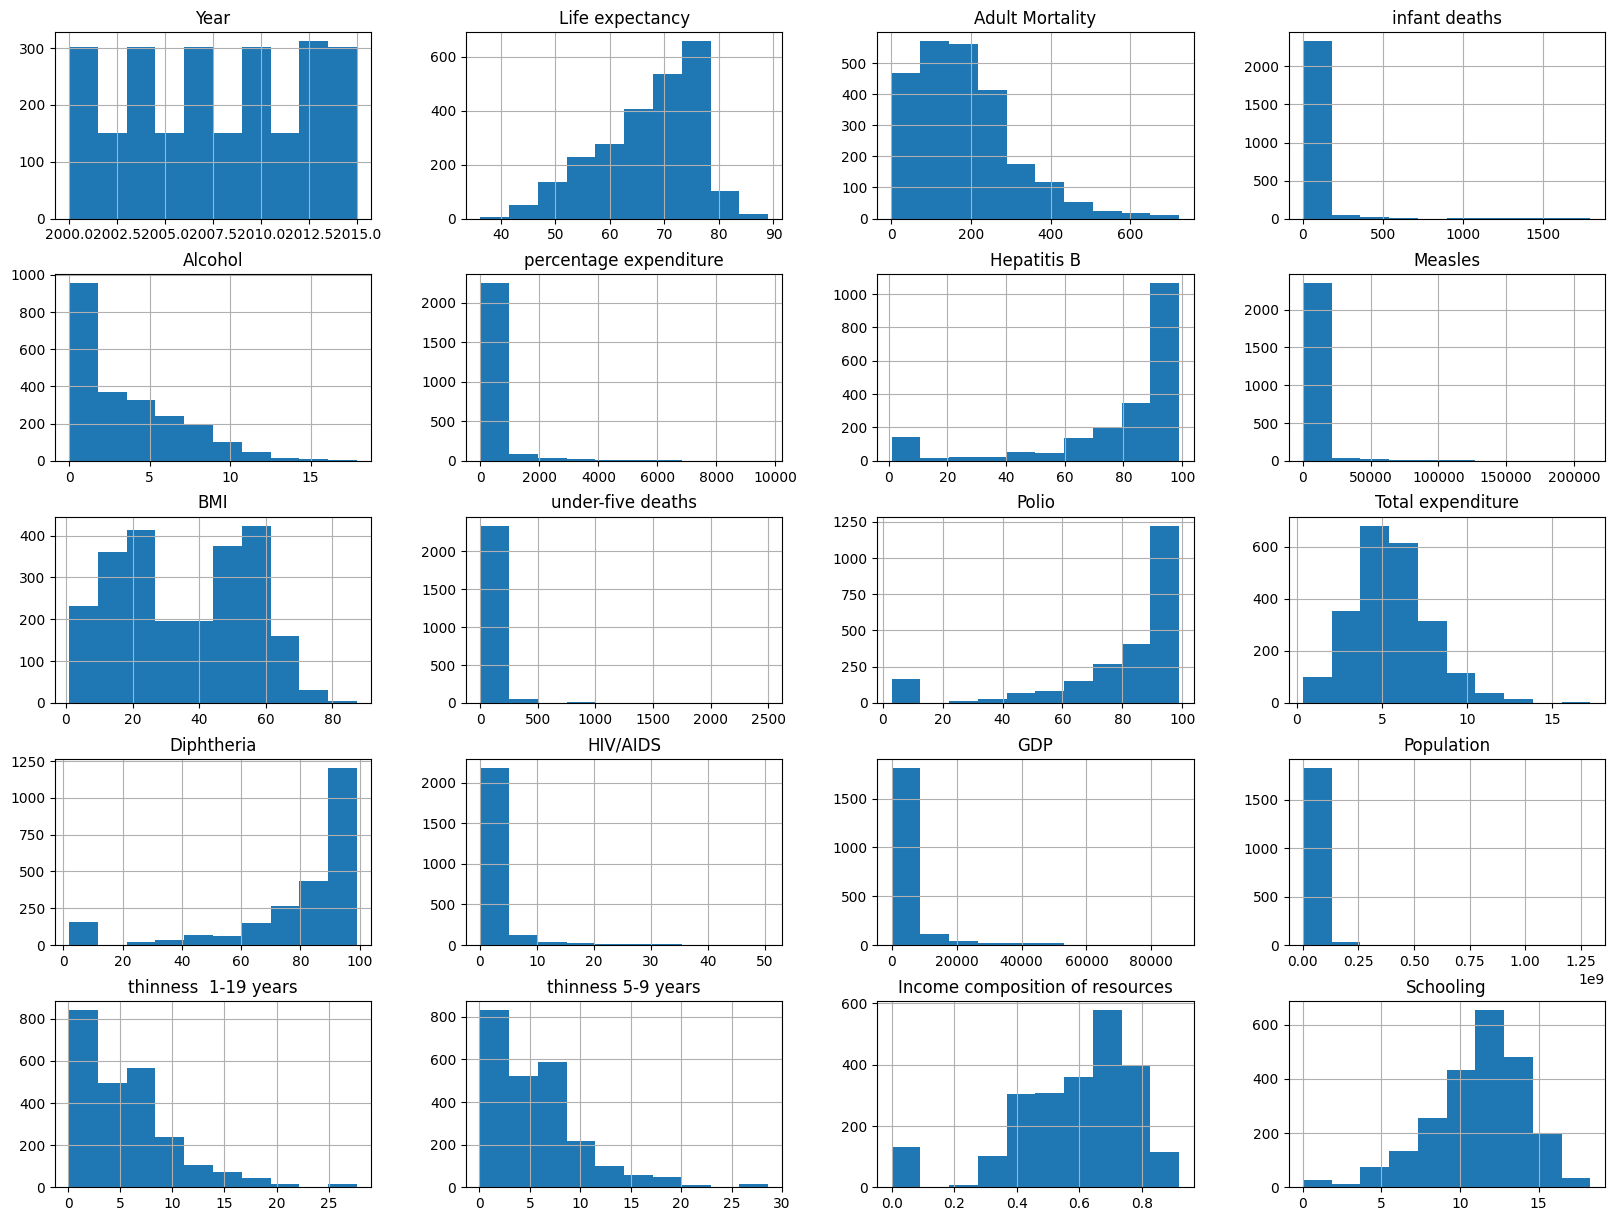

In [34]:
# Histograma dos países em desenvolvimento
dataset02.hist(figsize = (20,15))
plt.show()

**Como fizemos com o histograma, vamos criar um density plot para cada atributo dos datasets. Assim, veremos que muitos dos atributos têm uma distribuição distorcida.**

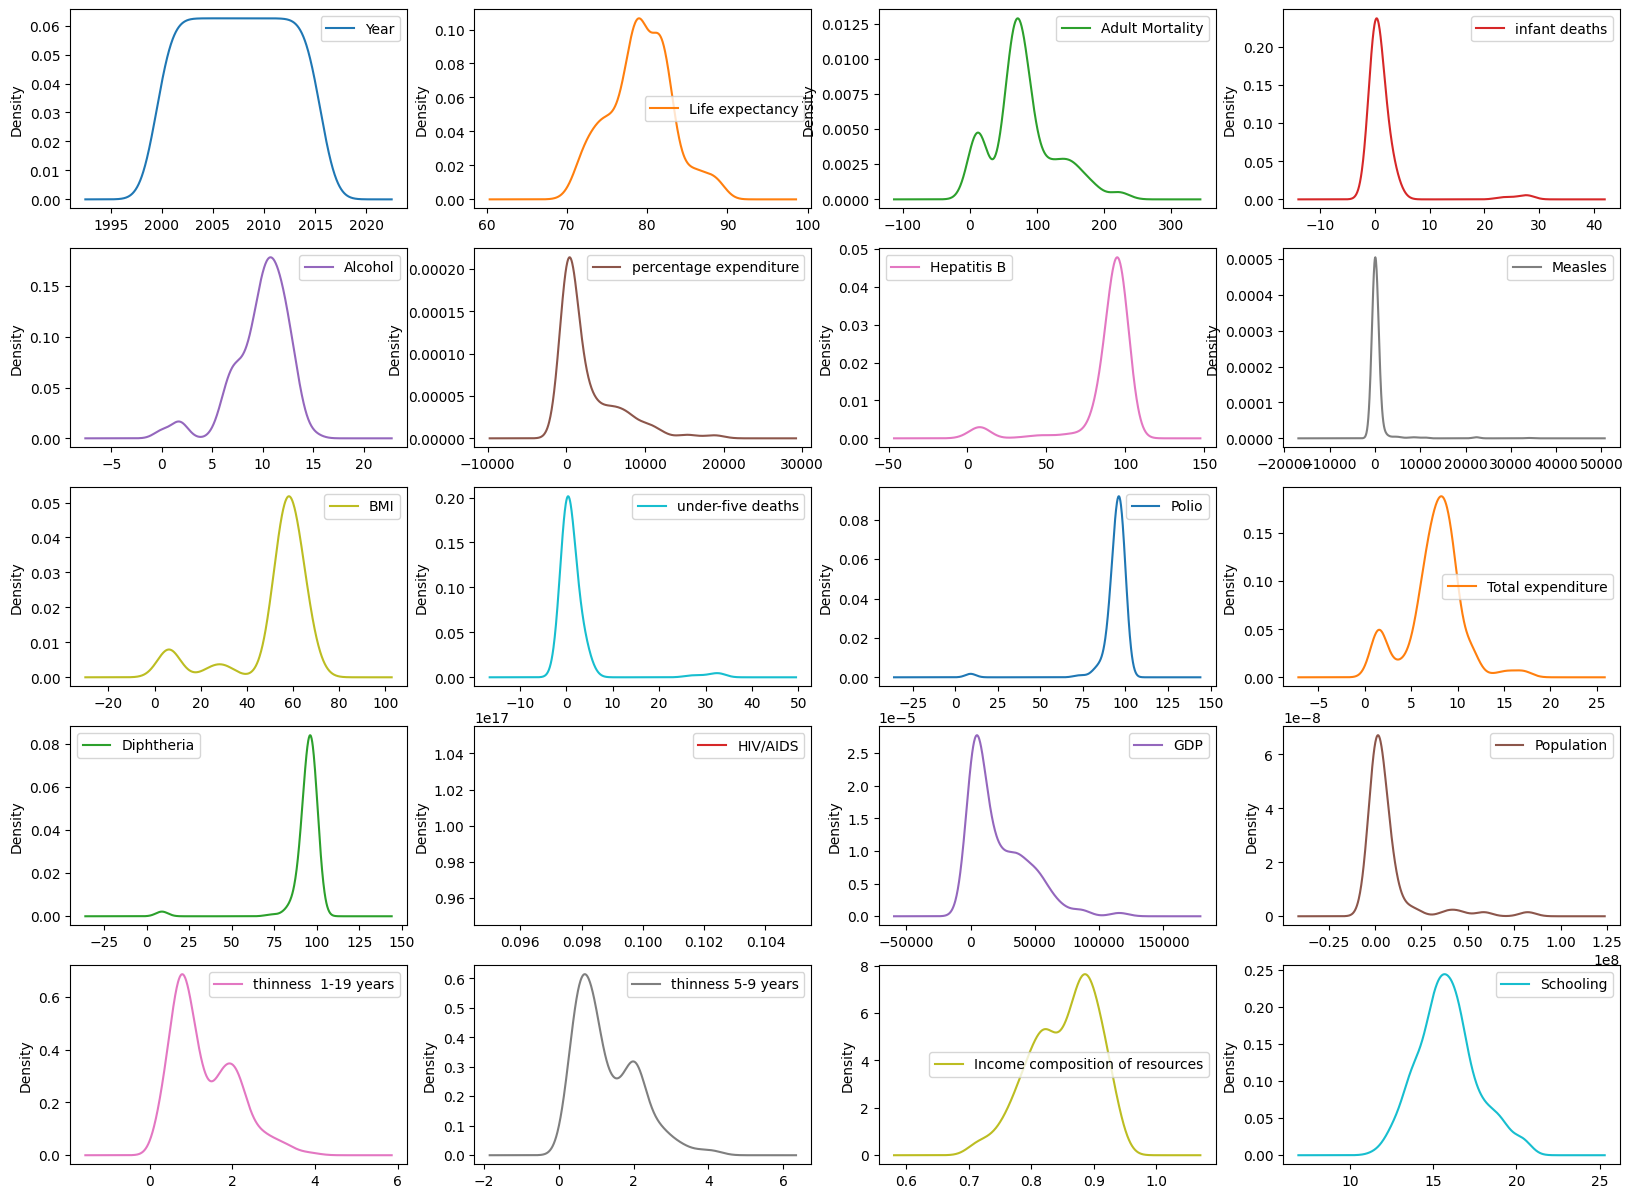

In [35]:
# Density Plot dos países desenvolvidos
dataset01.plot(kind = 'density', subplots = True, layout = (5,4), sharex = False, figsize = (20,15))
plt.show()

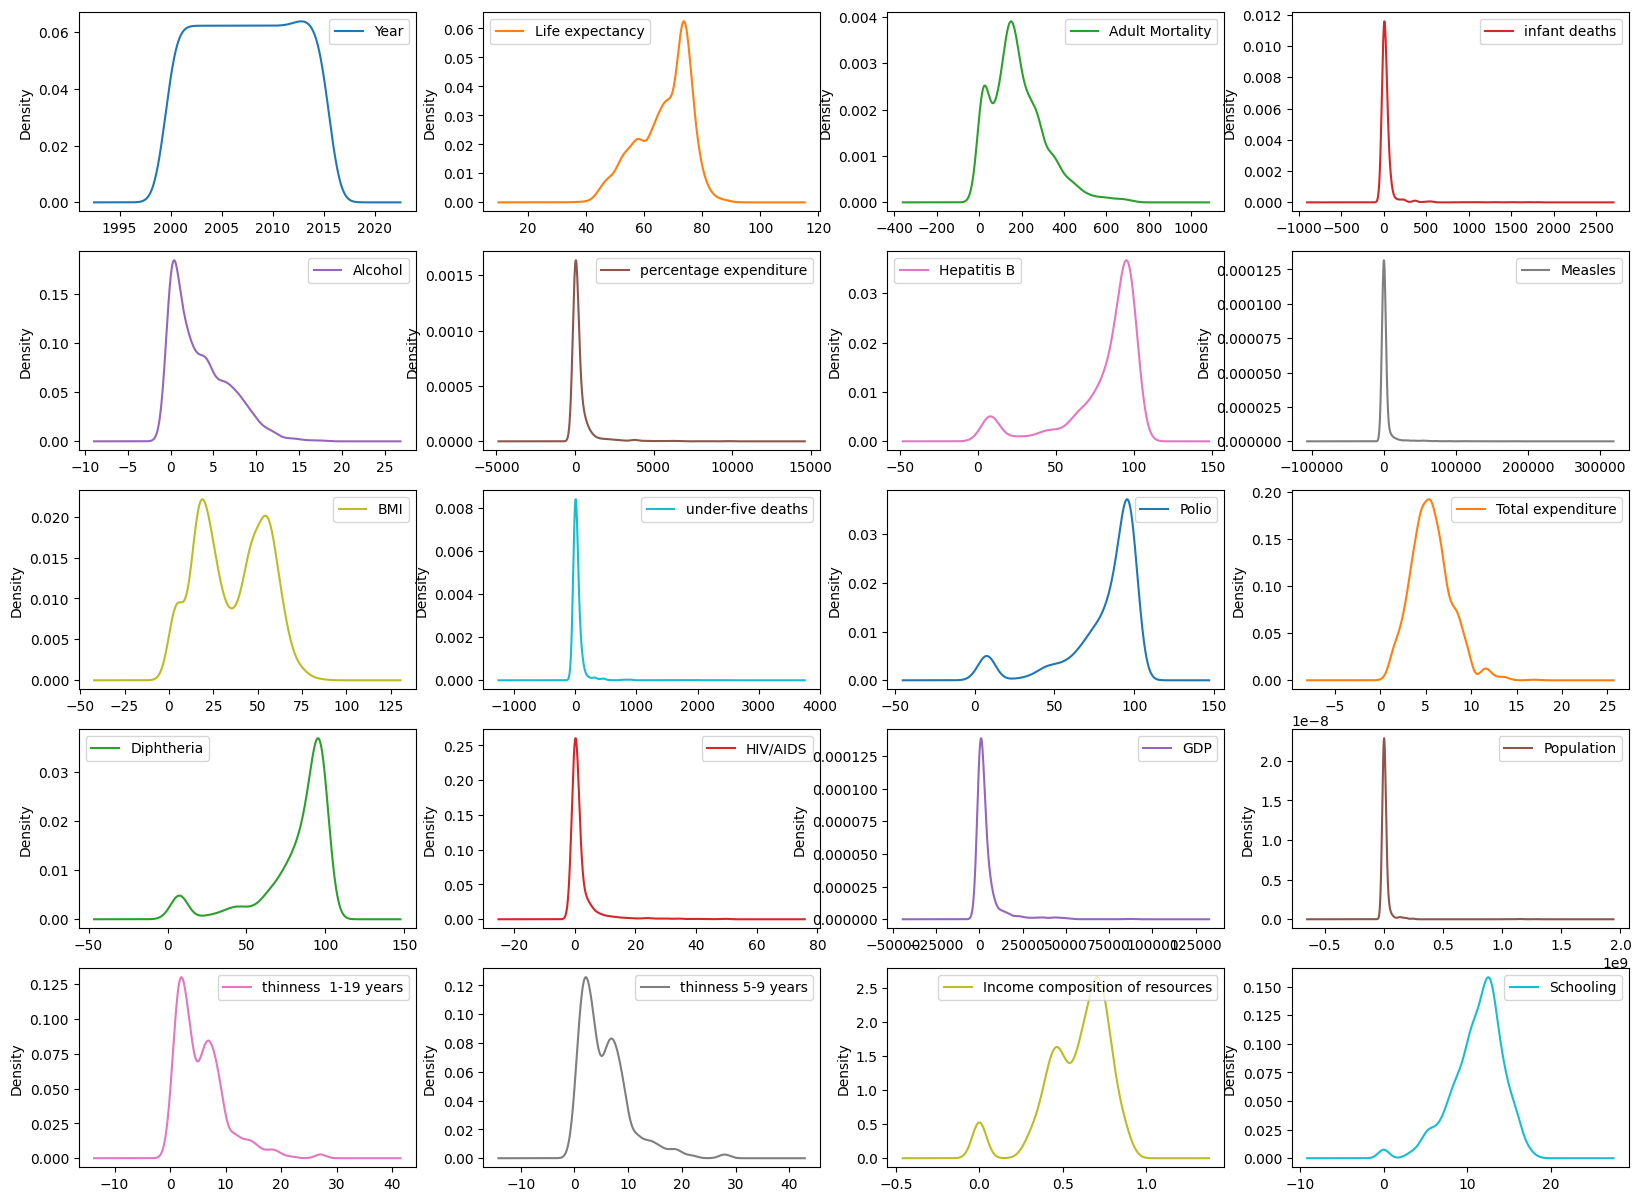

In [ ]:
# Density Plot dos países em desenvolvimento
dataset02.plot(kind = 'density', subplots = True, layout = (5,4), sharex = False, figsize = (20,15))
plt.show()

Vamos mostrar o **boxblot** dos atributos separados por status, assim como no gráficos anteriores.

É possivel observar outliers em ambos os datasets. Contudo, as discrepâncias ocorrem em diferentes atribuidos dos países desenvolvidos e em desenvolvimento.

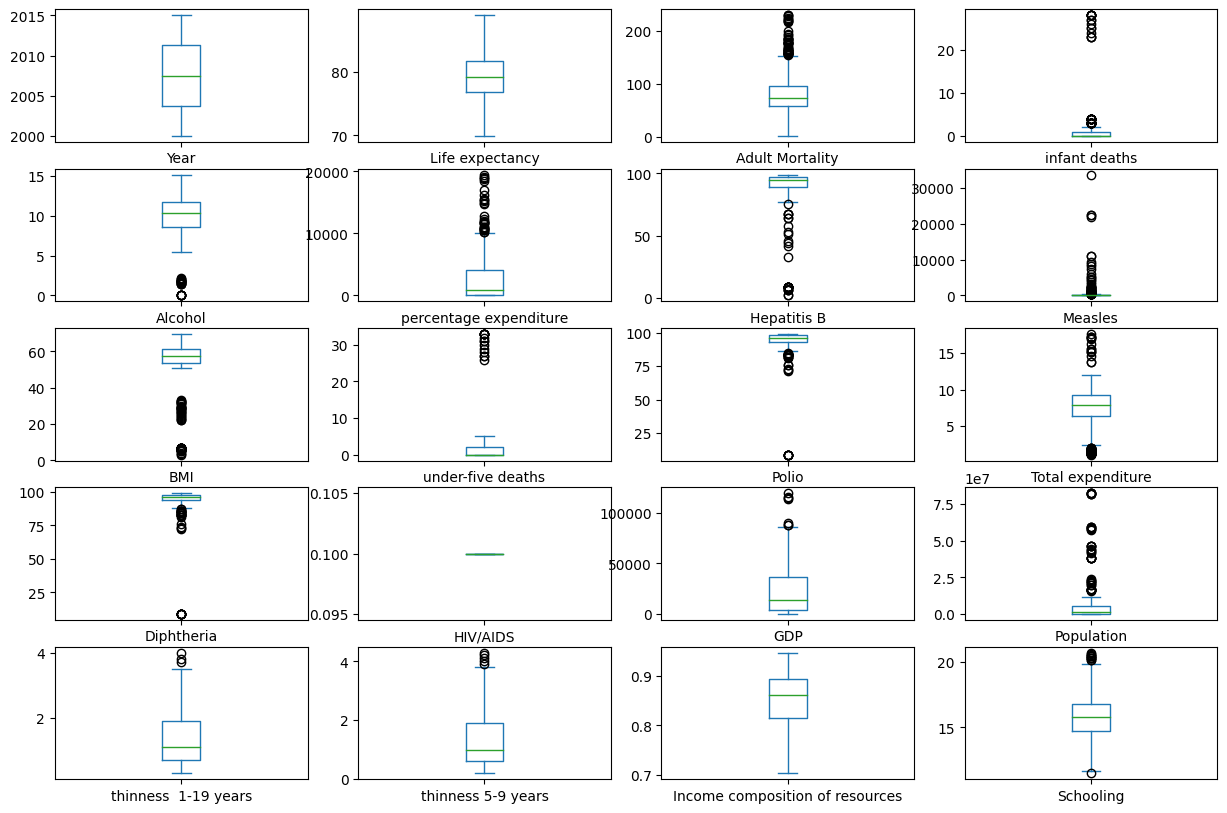

In [37]:
# Boxplot dos países dos países desenvolvidos
dataset01.plot(kind = 'box', subplots = True, layout = (5,4), sharex = False, sharey = False, figsize = (15,10))
plt.show()

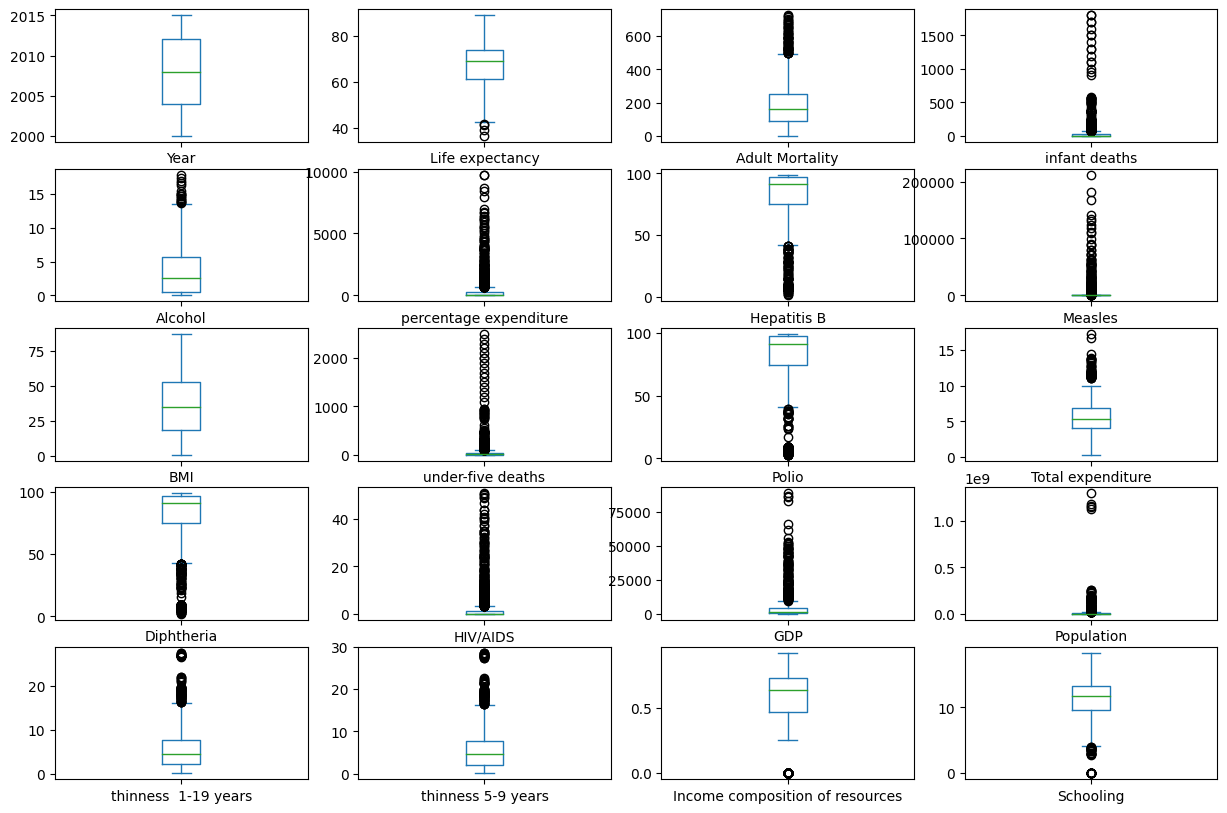

In [38]:
# Boxplot dos países em desenvolvimento
dataset02.plot(kind = 'box', subplots = True, layout = (5,4), sharex = False, sharey = False, figsize = (15,10))
plt.show()

# **Análise Multimodal**

Mostra as correlações entre os atributos através da matriz de correlação. Olhando pela ótica da expectativa de vida, perceberemos alguma correlação estrutural no que tange os status dos países.

-> Próximo de -1 : há uma correlação negativa entre as variáveis,

-> Próximo de +1: há uma correlação positiva entre as variáveis.

-> 0: não há correlação entre as variáveis.

No caso dos paises desenvolvidos as variáveis econômicas são mais correlacionadas com a expectativa de vida e as de saúde coletiva mostram baixa correlação.

Nos países em desenvolvimento, alguns atributos de saúde coletiva compõe as variáveis que tem correlação com a expectativa de vida.

Assim, reduzimos os datasets usando o critério de deixar as variáveis que possuem correlação >0,3 ou <-0,3, conforma matriz de correlação de Pearson.

In [51]:
# Remove a variável HIV/AIDS do dataset dos países desenvolvidos
dataset01 = dataset01.drop(columns=['HIV/AIDS'])

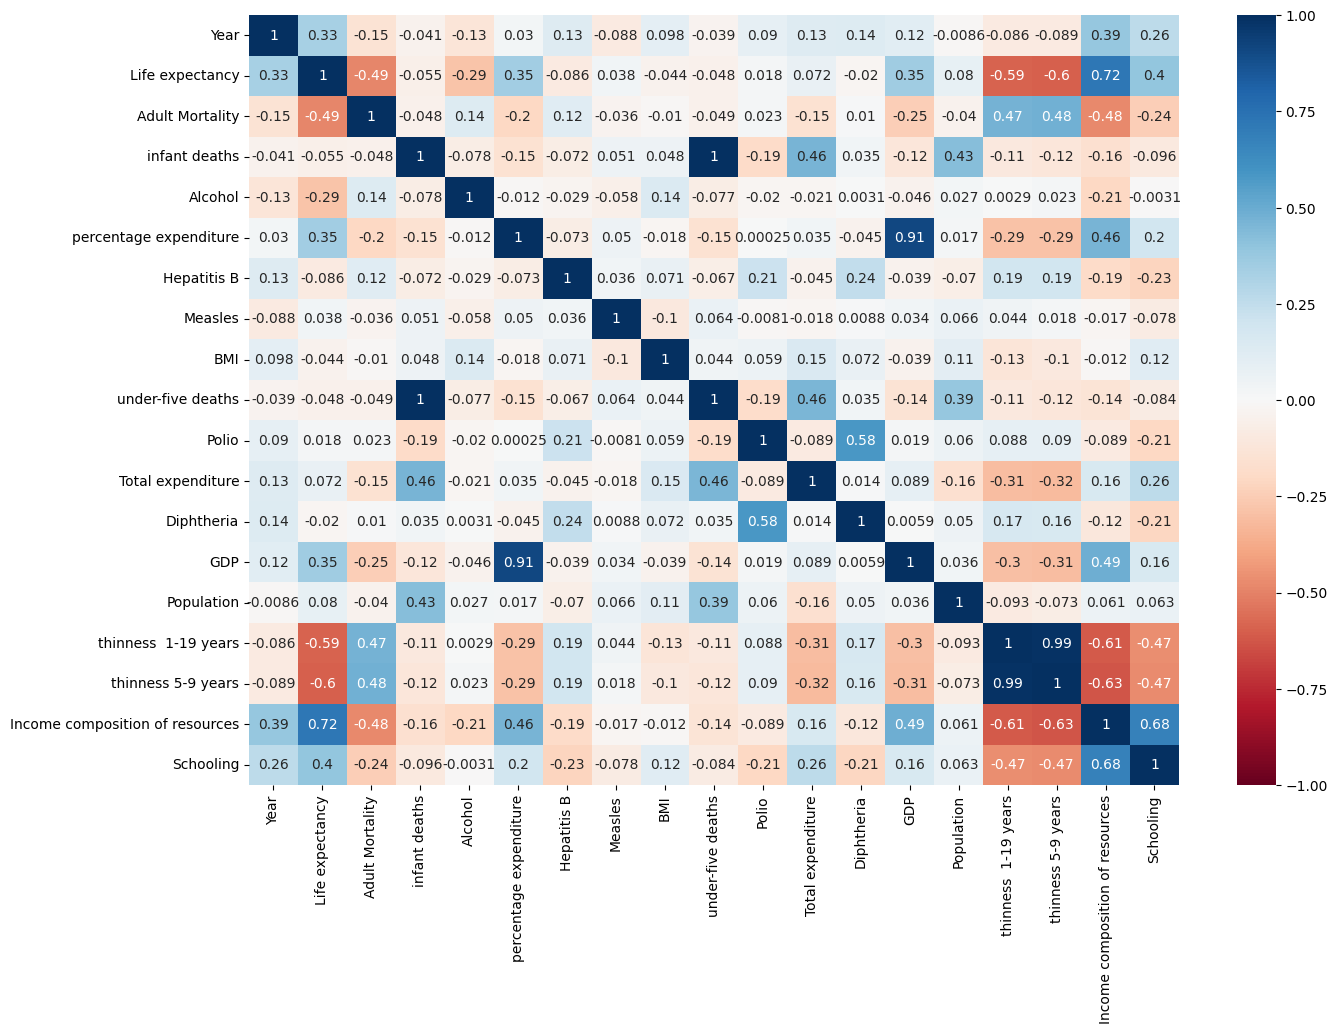

In [52]:
# Matriz de Correlação com Seaborn dos países desenvolvidos
plt.figure(figsize = (15,10))
sns.heatmap(dataset01.corr(), annot=True, cmap='RdBu', vmin=-1, vmax=1);

In [54]:
# Remove a variável do dataset dos países desenvolvidos
dataset01 = dataset01.drop(columns=['infant deaths','Alcohol','Hepatitis B','Measles','BMI','under-five deaths','Polio','Total expenditure','Diphtheria'])

In [55]:
dataset01.head(10)

,Country,Year,Status,Life expectancy,Adult Mortality,percentage expenditure,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
112,Australia,2015,Developed,82.8,59.0,0.000000,56554.38760,23789338.0,0.6,0.6,0.937,20.4
113,Australia,2014,Developed,82.7,6.0,10769.363050,62214.69120,2346694.0,0.6,0.6,0.936,20.4
114,Australia,2013,Developed,82.5,61.0,11734.853810,67792.33860,23117353.0,0.6,0.6,0.933,20.3
115,Australia,2012,Developed,82.3,61.0,11714.998580,67677.63477,22728254.0,0.6,0.6,0.930,20.1
116,Australia,2011,Developed,82.0,63.0,10986.265270,62245.12900,223424.0,0.6,0.6,0.927,19.8
117,Australia,2010,Developed,81.9,64.0,8875.786493,51874.84800,223175.0,0.7,0.6,0.927,19.5
118,Australia,2009,Developed,81.7,66.0,7172.275229,42742.99898,216917.0,0.7,0.6,0.925,19.1
119,Australia,2008,Developed,81.3,66.0,8547.292357,49664.68540,212492.0,0.7,0.6,0.921,19.1
120,Australia,2007,Developed,81.3,66.0,872.598609,4991.98289,28276.0,0.7,0.6,0.918,19.0
121,Australia,2006,Developed,81.2,66.0,6187.062017,36118.28381,26979.0,0.7,0.6,0.915,20.3


In [57]:
# Mostra as dimensões do dataset01
dataset01.shape

(512, 12)

In [58]:
# Verifica o tipo de dataset01 de cada atributo
dataset.dtypes
dataset01.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 512 entries, 112 to 2809
Data columns (total 12 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          512 non-null    object 
 1   Year                             512 non-null    int64  
 2   Status                           512 non-null    object 
 3   Life expectancy                  512 non-null    float64
 4   Adult Mortality                  512 non-null    float64
 5   percentage expenditure           512 non-null    float64
 6   GDP                              448 non-null    float64
 7   Population                       416 non-null    float64
 8   thinness  1-19 years             512 non-null    float64
 9   thinness 5-9 years               512 non-null    float64
 10  Income composition of resources  464 non-null    float64
 11  Schooling                        464 non-null    float64
dtypes: float64(9), int6

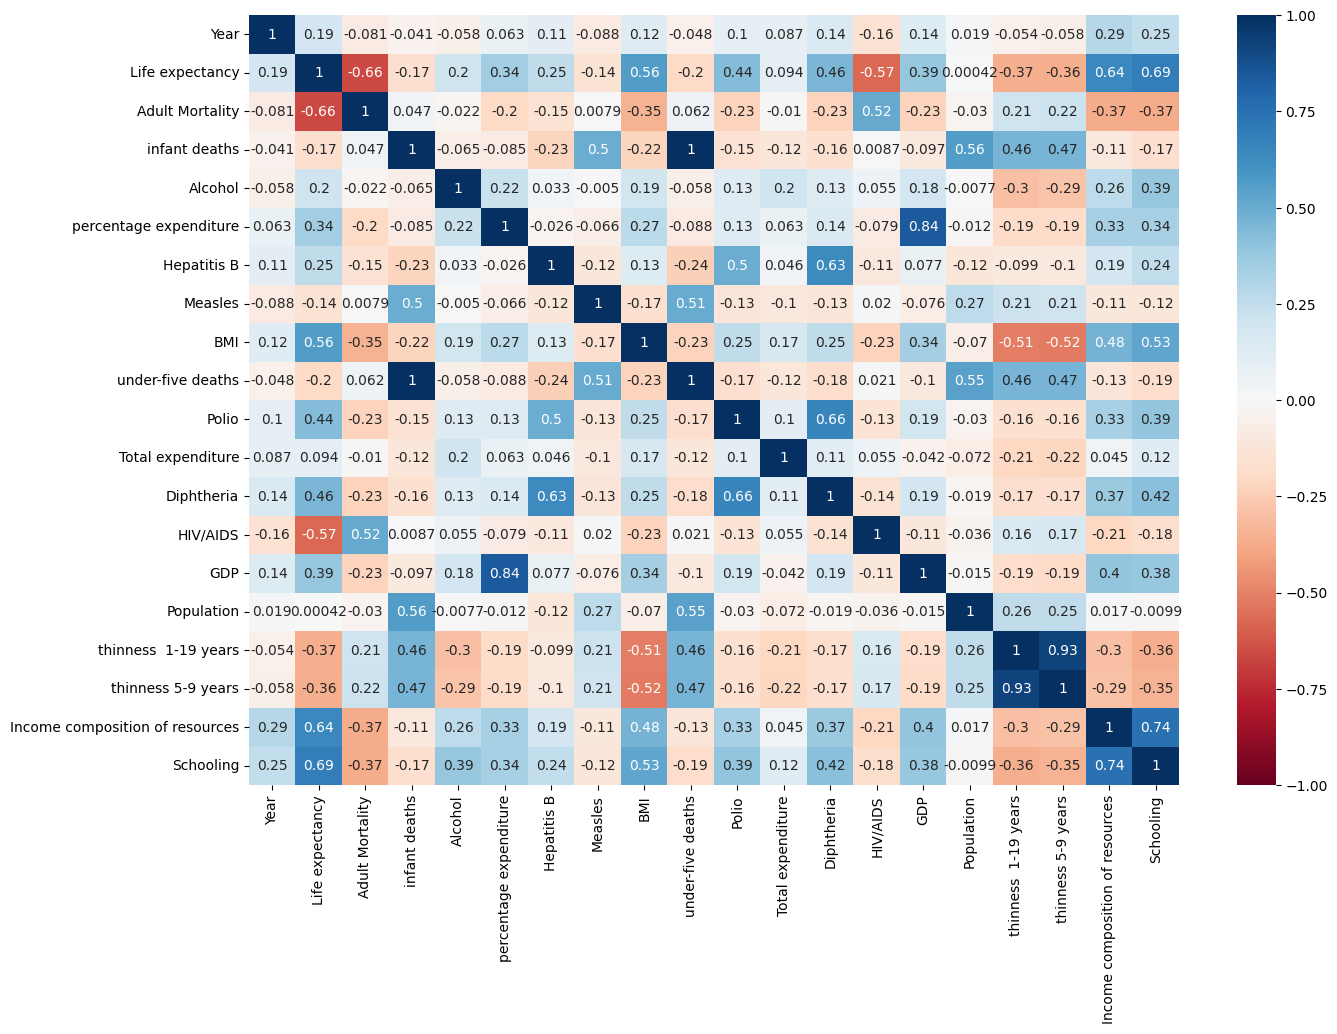

In [ ]:
# Matriz de Correlação com Seaborn dos paises em desenvolvimento
plt.figure(figsize = (15,10))
sns.heatmap(dataset02.corr(), annot=True, cmap='RdBu', vmin=-1, vmax=1);

In [60]:
# Remove a variável do dataset02 dos países desenvolvidos
dataset02 = dataset02.drop(columns=['infant deaths','Alcohol','Measles','under-five deaths','Total expenditure','Population'])

In [64]:
dataset02.head(10)

,Country,Year,Status,Life expectancy,Adult Mortality,percentage expenditure,Hepatitis B,BMI,Polio,Diphtheria,HIV/AIDS,GDP,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,71.279624,65.0,19.1,6.0,65.0,0.1,584.259210,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,73.523582,62.0,18.6,58.0,62.0,0.1,612.696514,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,73.219243,64.0,18.1,62.0,64.0,0.1,631.744976,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,78.184215,67.0,17.6,67.0,67.0,0.1,669.959000,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,7.097109,68.0,17.2,68.0,68.0,0.1,63.537231,18.2,18.2,0.454,9.5
5,Afghanistan,2010,Developing,58.8,279.0,79.679367,66.0,16.7,66.0,66.0,0.1,553.328940,18.4,18.4,0.448,9.2
6,Afghanistan,2009,Developing,58.6,281.0,56.762217,63.0,16.2,63.0,63.0,0.1,445.893298,18.6,18.7,0.434,8.9
7,Afghanistan,2008,Developing,58.1,287.0,25.873925,64.0,15.7,64.0,64.0,0.1,373.361116,18.8,18.9,0.433,8.7
8,Afghanistan,2007,Developing,57.5,295.0,10.910156,63.0,15.2,63.0,63.0,0.1,369.835796,19.0,19.1,0.415,8.4
9,Afghanistan,2006,Developing,57.3,295.0,17.171518,64.0,14.7,58.0,58.0,0.1,272.563770,19.2,19.3,0.405,8.1


In [65]:
# Mostra as dimensões do dataset01
dataset02.shape

(2426, 16)

In [66]:
# Verifica o tipo de dataset01 de cada atributo
dataset.dtypes
dataset02.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2426 entries, 0 to 2937
Data columns (total 16 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2426 non-null   object 
 1   Year                             2426 non-null   int64  
 2   Status                           2426 non-null   object 
 3   Life expectancy                  2416 non-null   float64
 4   Adult Mortality                  2416 non-null   float64
 5   percentage expenditure           2426 non-null   float64
 6   Hepatitis B                      2046 non-null   float64
 7   BMI                              2392 non-null   float64
 8   Polio                            2407 non-null   float64
 9   Diphtheria                       2407 non-null   float64
 10  HIV/AIDS                         2426 non-null   float64
 11  GDP                              2042 non-null   float64
 12  thinness  1-19 years

# **4. Pré-Processamento de dados**

### 4.1. Tratamento de Missings e Limpeza

4.1.1. Paises Desenvolvidos - Tratamento de Missings e Limpeza

In [70]:
# verificando nulls no dataset
dataset01.isnull().sum()

Country                             0
Year                                0
Status                              0
Life expectancy                     0
Adult Mortality                     0
percentage expenditure              0
GDP                                64
Population                         96
thinness  1-19 years                0
thinness 5-9 years                  0
Income composition of resources    48
Schooling                          48
dtype: int64

<Axes: >

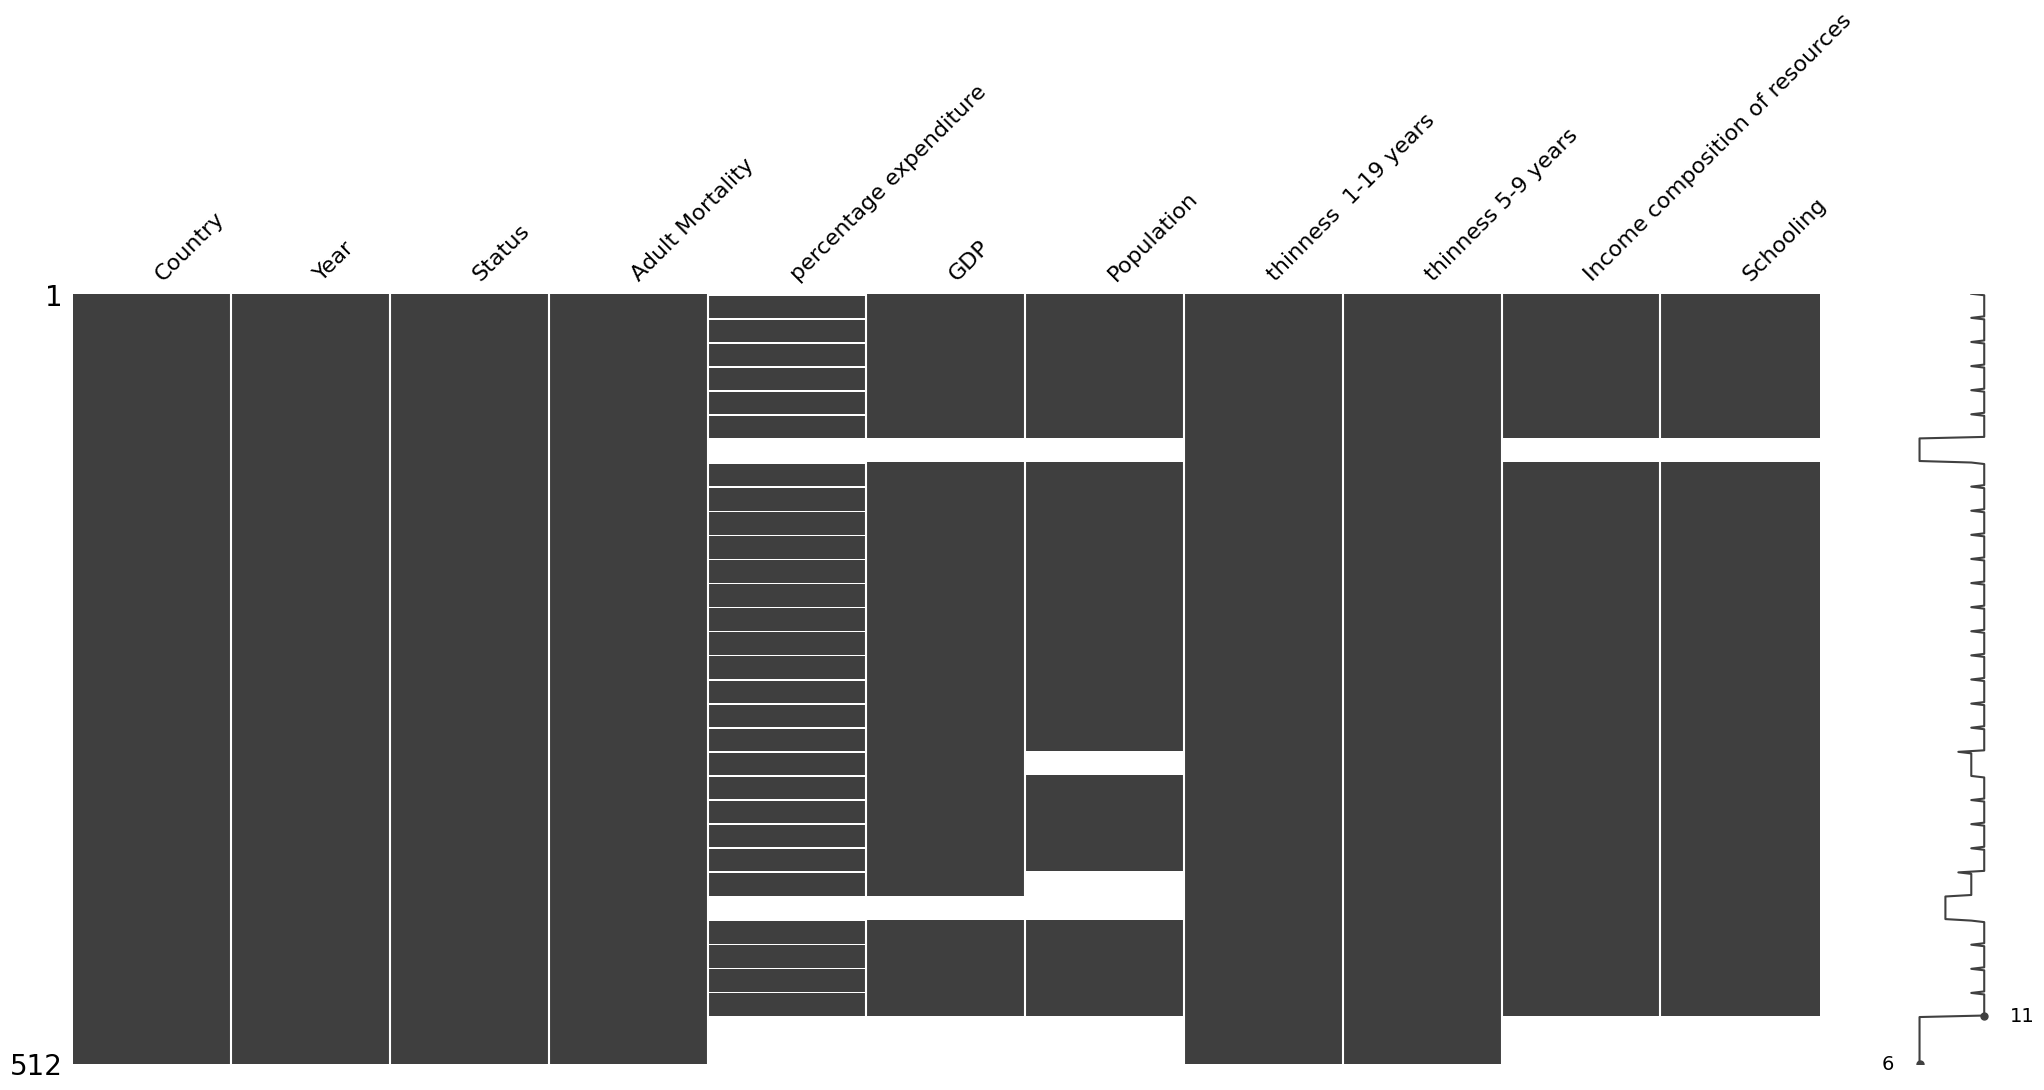

In [83]:
# recuperando os nomes das colunas
col = list(dataset01.columns)

# o novo dataset irá conter todas as colunas com exceção da expectativa de vida
atributos = dataset01.drop(columns=['Life expectancy'])

# substituindo os zeros por NaN
atributos.replace(0, np.nan, inplace=True)

# exibindo visualização matricial da nulidade do dataset
ms.matrix(atributos)

<Axes: >

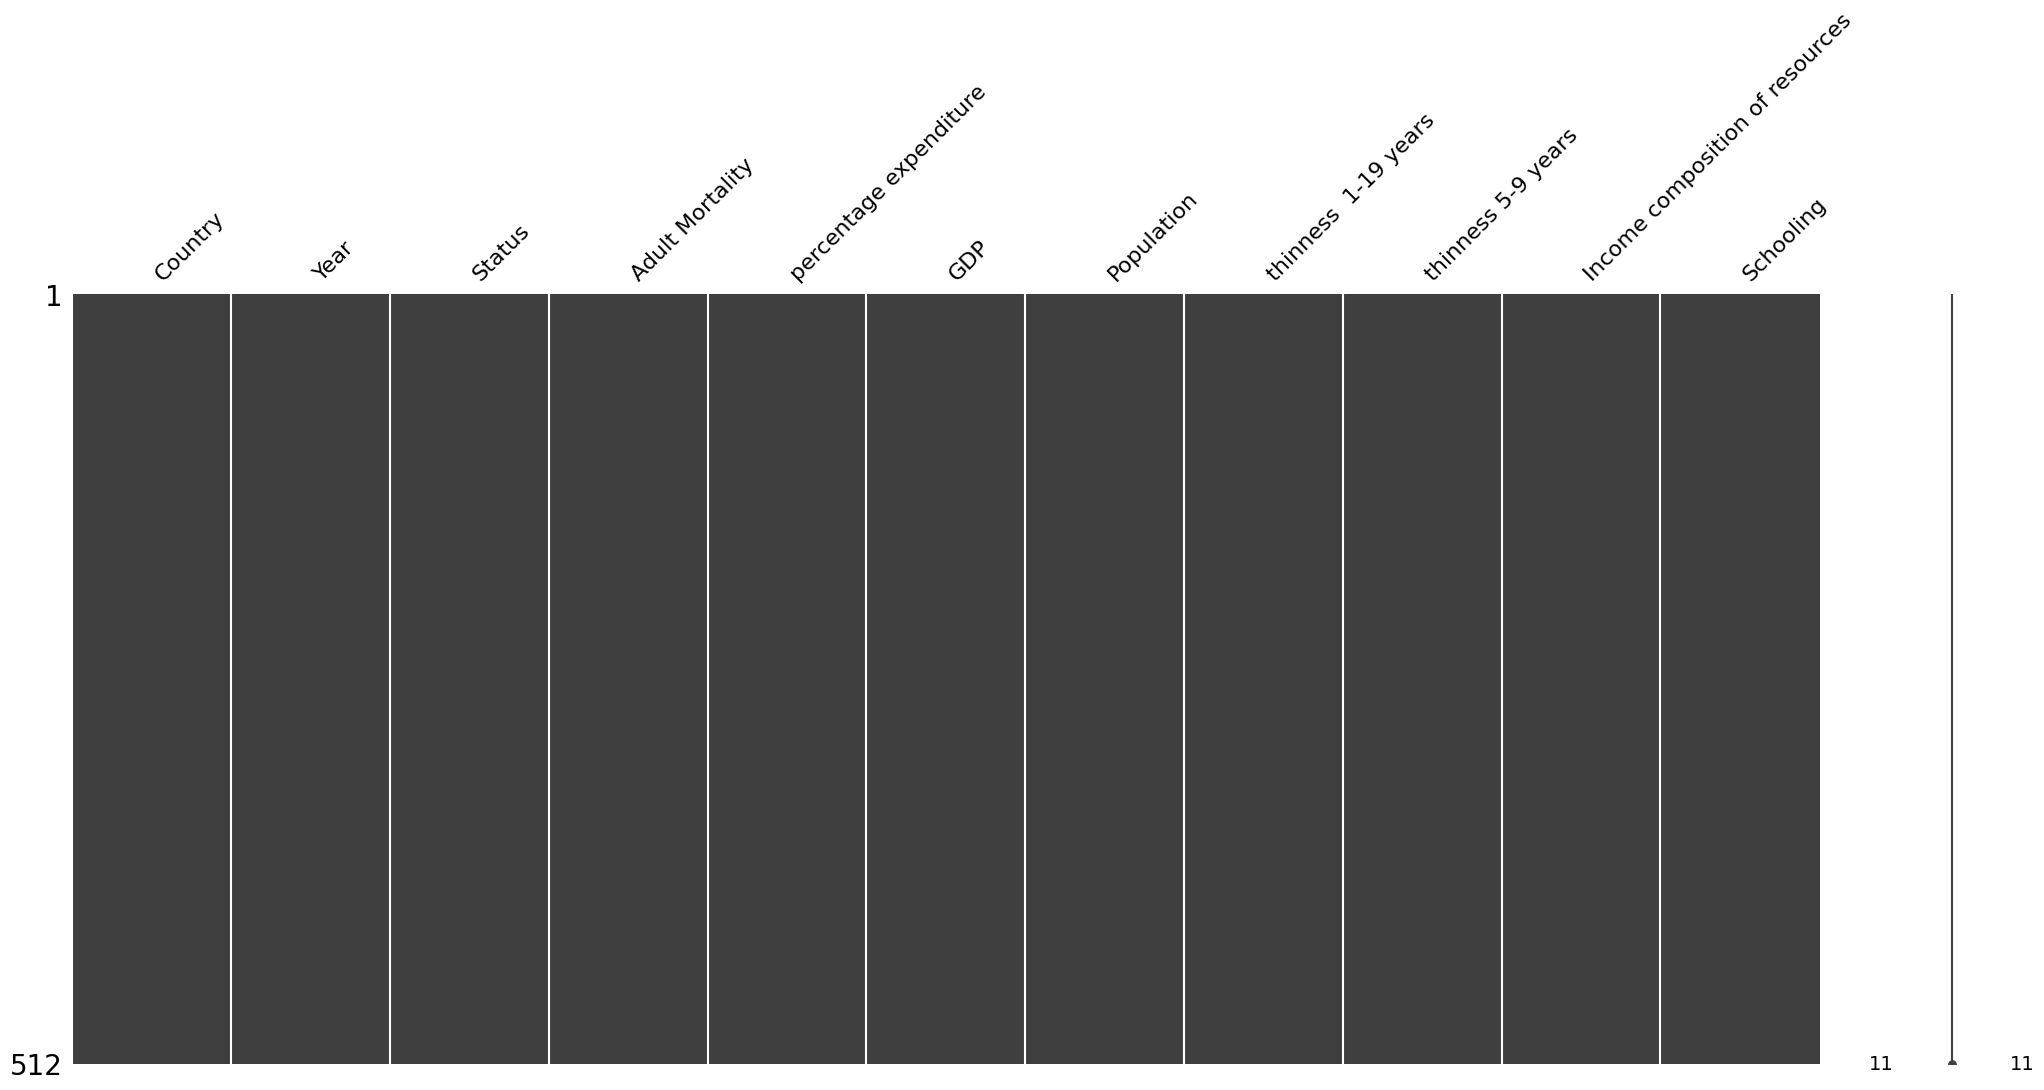

In [84]:
# substituindo os NaN de 'Schooling' por 0
atributos['Schooling'].fillna(0, inplace=True)

# substituindo os NaN pela mediana da coluna
atributos['percentage expenditure'].fillna(atributos['percentage expenditure'].median(), inplace=True)
atributos['GDP'].fillna(atributos['GDP'].median(), inplace=True)
atributos['Population'].fillna(atributos['Population'].median(), inplace=True)
atributos['Income composition of resources'].fillna(atributos['Income composition of resources'].median(), inplace=True)

# exibindo visualização matricial da nulidade do dataset
ms.matrix(atributos)

In [105]:
# Guardando o novo dataset para testes futuros
datasetSemMissings = atributos

# incluindo a coluna 'class' no novo dataset
datasetSemMissings['Life expectancy'] = dataset01['Life expectancy']

# exibindo as primeiras linhas
datasetSemMissings.head()

,Country,Year,Status,Adult Mortality,percentage expenditure,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling,Life expectancy
112,Australia,2015,Developed,59.0,1517.169792,56554.38760,23789338.0,0.6,0.6,0.937,20.4,82.8
113,Australia,2014,Developed,6.0,10769.363050,62214.69120,2346694.0,0.6,0.6,0.936,20.4,82.7
114,Australia,2013,Developed,61.0,11734.853810,67792.33860,23117353.0,0.6,0.6,0.933,20.3,82.5
115,Australia,2012,Developed,61.0,11714.998580,67677.63477,22728254.0,0.6,0.6,0.930,20.1,82.3
116,Australia,2011,Developed,63.0,10986.265270,62245.12900,223424.0,0.6,0.6,0.927,19.8,82.0


4.1.2. Paises em Desenvolvimento - Tratamento de Missings e Limpeza

In [85]:
# verificando nulls no dataset
dataset02.isnull().sum()

Country                              0
Year                                 0
Status                               0
Life expectancy                     10
Adult Mortality                     10
percentage expenditure               0
Hepatitis B                        380
BMI                                 34
Polio                               19
Diphtheria                          19
HIV/AIDS                             0
GDP                                384
thinness  1-19 years                34
thinness 5-9 years                  34
Income composition of resources    119
Schooling                          115
dtype: int64

<Axes: >

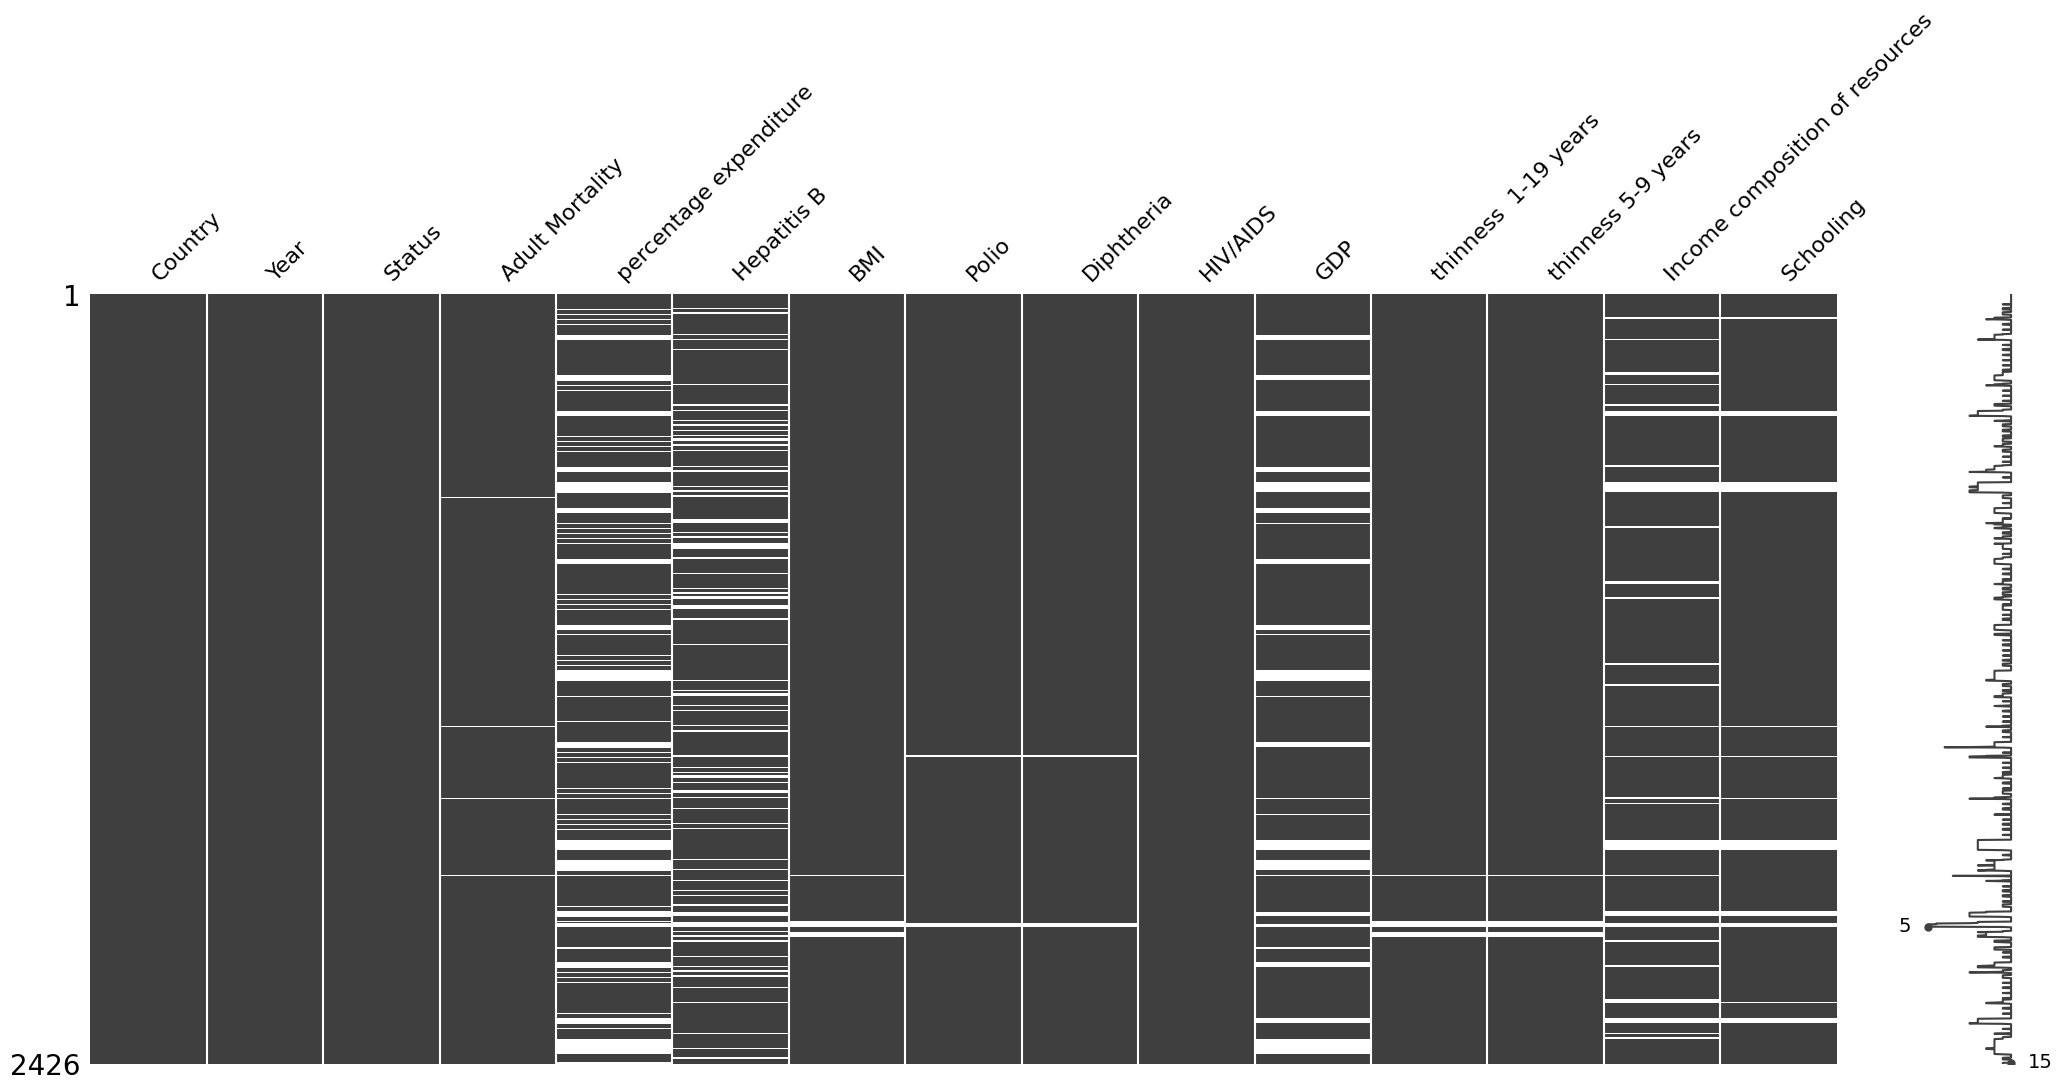

In [100]:
# recuperando os nomes das colunas
col02 = list(dataset02.columns)

# o novo dataset irá conter todas as colunas com exceção da expectativa de vida
atributos02 = dataset02.drop(columns=['Life expectancy'])

# substituindo os zeros por NaN
atributos02.replace(0, np.nan, inplace=True)

# exibindo visualização matricial da nulidade do dataset
ms.matrix(atributos02)

<Axes: >

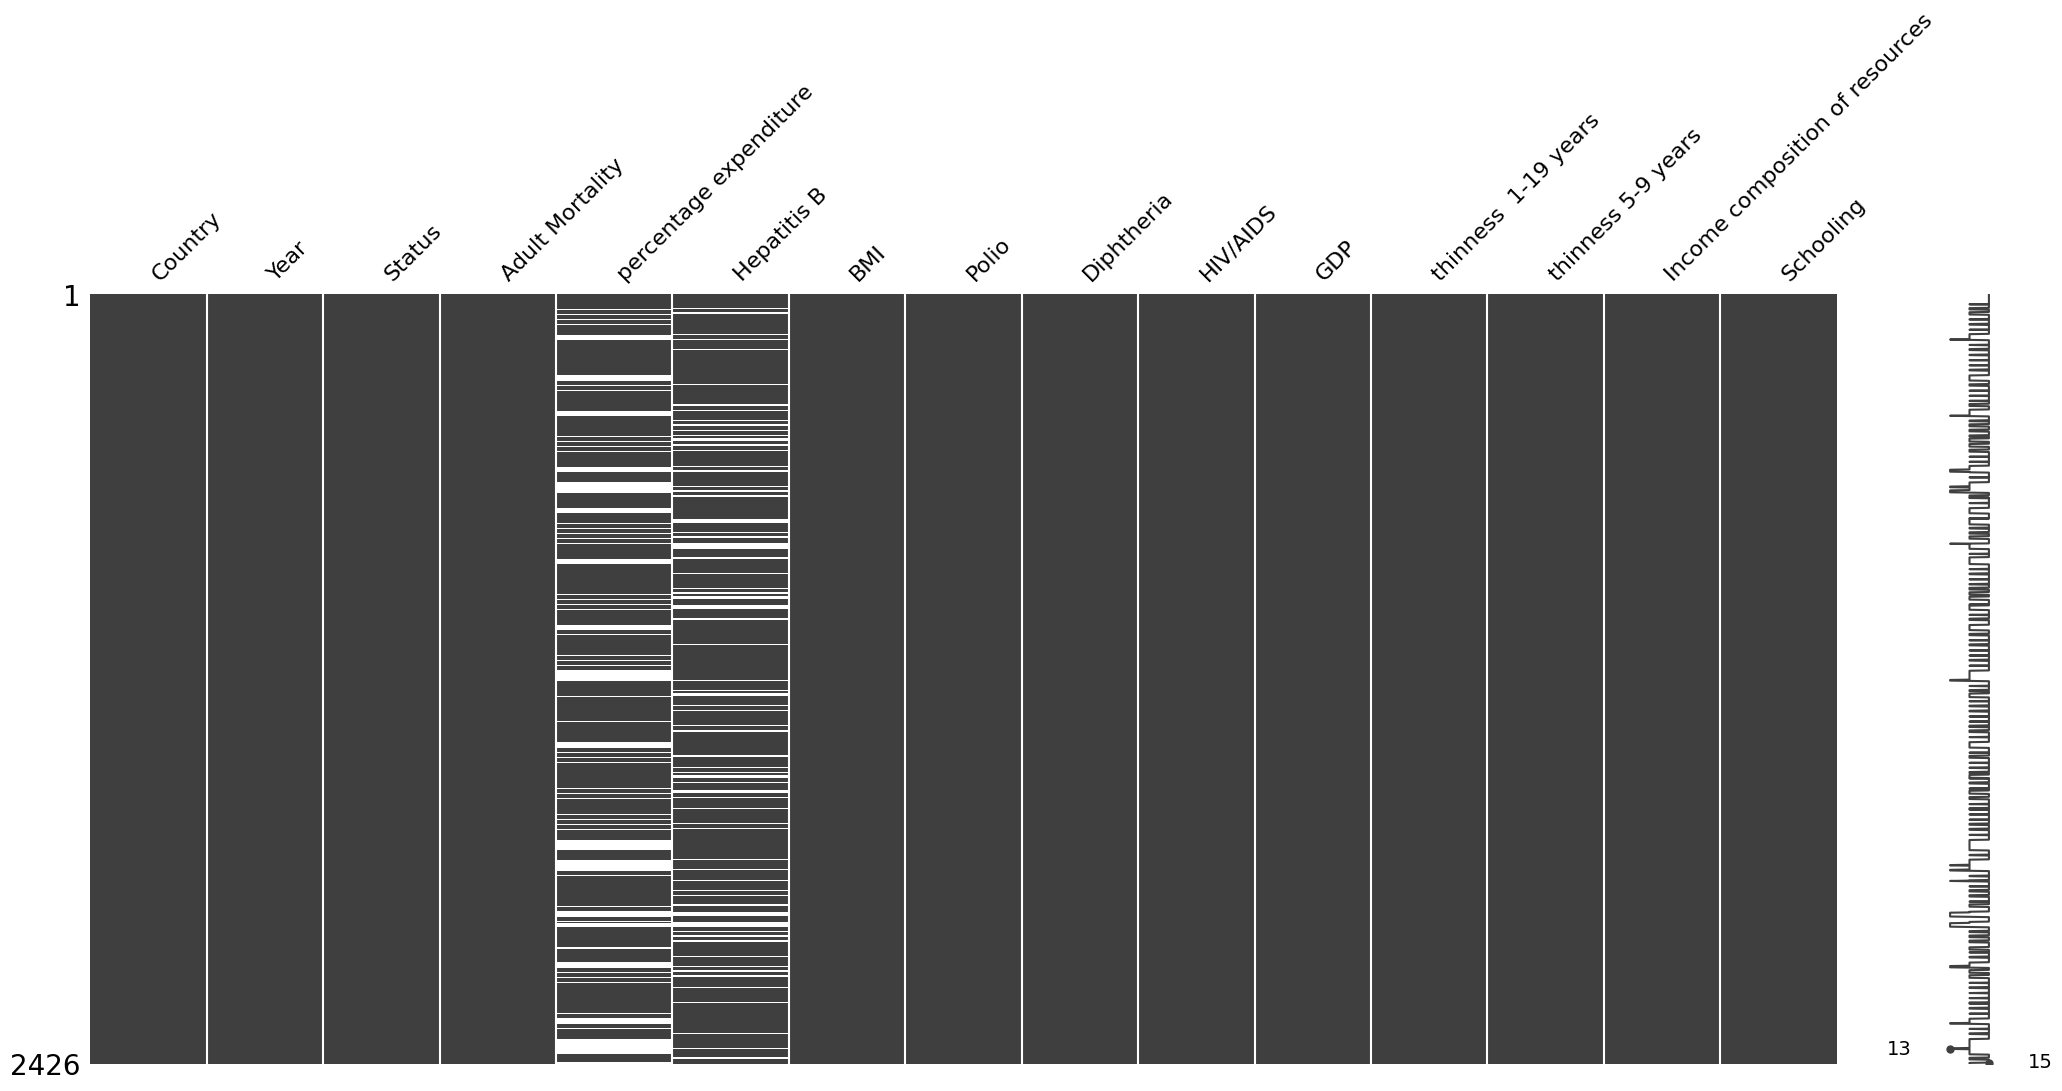

In [101]:
# substituindo os NaN de 'Schooling' por 0
atributos02['Schooling'].fillna(0, inplace=True)

# substituindo os NaN pela mediana da coluna
atributos02['Adult Mortality'].fillna(atributos02['Adult Mortality'].median(), inplace=True)
atributos02['BMI'].fillna(atributos02['BMI'].median(), inplace=True)
atributos02['Polio'].fillna(atributos02['Polio'].median(), inplace=True)
atributos02['GDP'].fillna(atributos02['GDP'].median(), inplace=True)
atributos02['Diphtheria'].fillna(atributos02['Diphtheria'].median(), inplace=True)
atributos02['thinness  1-19 years'].fillna(atributos02['thinness  1-19 years'].median(), inplace=True)
atributos02['thinness 5-9 years'].fillna(atributos02['thinness 5-9 years'].median(), inplace=True)
atributos02['Income composition of resources'].fillna(atributos02['Income composition of resources'].median(), inplace=True)

# exibindo visualização matricial da nulidade do dataset
ms.matrix(atributos02)

In [ ]:
# removendo Hepatite B e Despesa Dercentual
atributos02 = atributos02.drop(columns=['percentage expenditure','Hepatitis B'])

<Axes: >

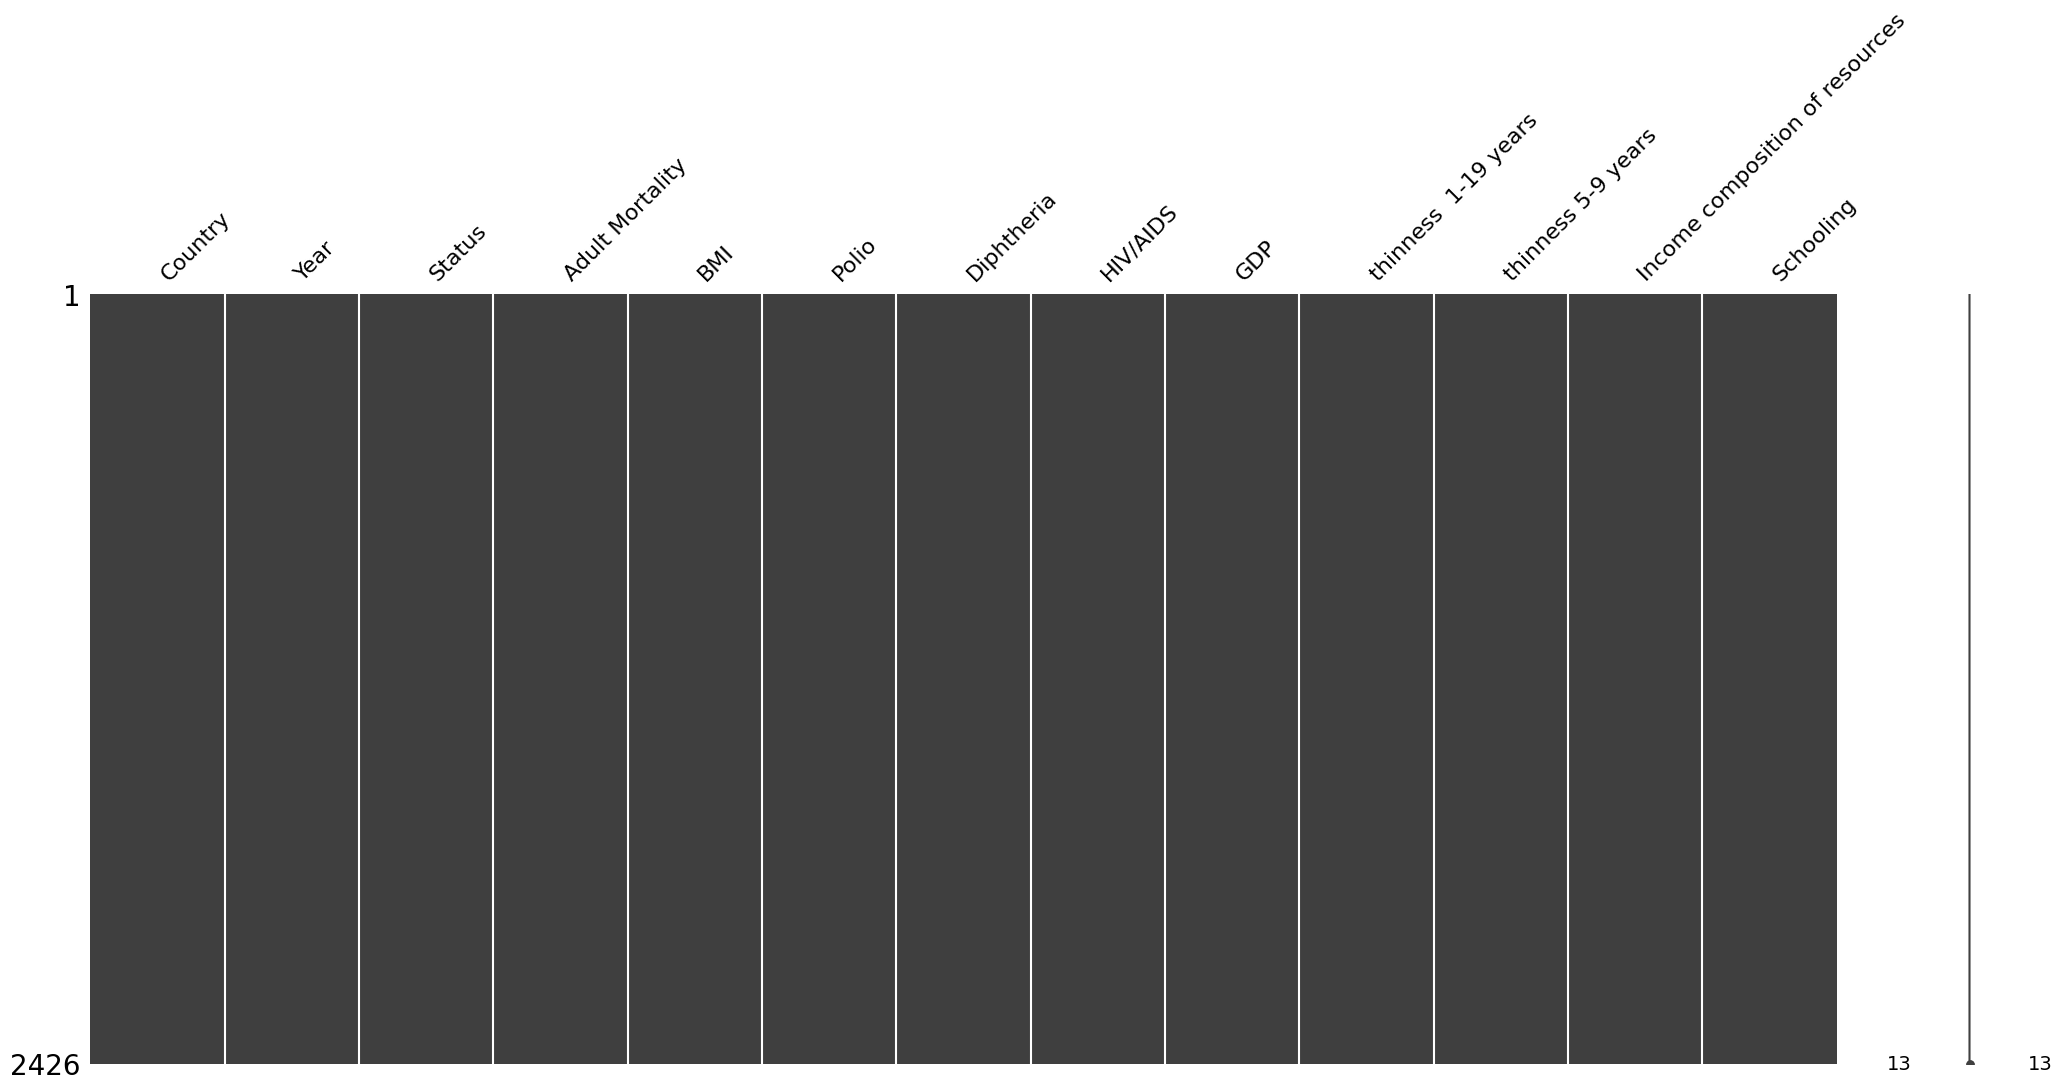

In [104]:
# exibindo visualização matricial da nulidade do dataset
ms.matrix(atributos02)

In [107]:
# Guardando o novo dataset para testes futuros
datasetSemMissings02 = atributos02

# incluindo a coluna 'class' no novo dataset
datasetSemMissings02['Life expectancy'] = dataset02['Life expectancy']

# exibindo as primeiras linhas
datasetSemMissings02.head()

,Country,Year,Status,Adult Mortality,BMI,Polio,Diphtheria,HIV/AIDS,GDP,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling,Life expectancy
0,Afghanistan,2015,Developing,263.0,19.1,6.0,65.0,0.1,584.259210,17.2,17.3,0.479,10.1,65.0
1,Afghanistan,2014,Developing,271.0,18.6,58.0,62.0,0.1,612.696514,17.5,17.5,0.476,10.0,59.9
2,Afghanistan,2013,Developing,268.0,18.1,62.0,64.0,0.1,631.744976,17.7,17.7,0.470,9.9,59.9
3,Afghanistan,2012,Developing,272.0,17.6,67.0,67.0,0.1,669.959000,17.9,18.0,0.463,9.8,59.5
4,Afghanistan,2011,Developing,275.0,17.2,68.0,68.0,0.1,63.537231,18.2,18.2,0.454,9.5,59.2


### 4.2. Separação em conjunto de treino e conjunto de teste

4.2.1. Paises Desenvolvidos: Separação em conjunto de treino e conjunto de teste.

In [108]:
datasetSemMissings.shape

(512, 12)

In [141]:
# Separação em bases de treino e teste (holdout)

array = datasetSemMissings.values
X = array[:,0:11] # atributos
y = array[:,11] # classe (target)

X_train, X_test, y_train, y_test = tX_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=7) # com estratificação

4.2.2. Países em Desenvolvimento: Separação em conjunto de treino e conjunto de teste.

In [142]:
datasetSemMissings02.shape

(2426, 14)

In [143]:
# Separação em bases de treino e teste (holdout)

array = datasetSemMissings02.values
X = array[:,0:13] # atributos
y = array[:,13] # classe (target)

X_train, X_test, y_train, y_test = tX_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=7) # com estratificação

# **Conclusão**
Neste MVP foi possível verificar que a Experctativa de vida e suas variáveis de cada grupo de paises, desenvolvidos e em desenvolvimentos, tem indicadores pasticulares para determinar a expectativa de vida.

No caso dos Desenvolvidos, os dados socioeconômicos tem maior correlação. Já os paises em desenvolvimento, além dos socioeconômicos, os dados de saúde coletiva sugerem influenciar na expectativa de vida.

Os pontos de atenção ficam para o custo computacional da base de dados (quanto maior a quantidade de paises e anos, mais difícil rodar scripts complexos) e suas discrepância, principalmente nos países em desenvolvimento, pela grande quantidade de instâncias e distãncia nas medidas estatatísticas de posição e variabilidade.